In [52]:
import pandas as pd 
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure 

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots to create

In [53]:
# Read in the data 

df = pd.read_csv(r"C:\Users\antoo\Downloads\movies.csv\movies.csv")


In [54]:
# looking at the data 

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [55]:
# Missing data check 

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [56]:
#Data types in columns 

df.dtypes 

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [57]:
#change data types in columns 

# df['budget'] = df['budget'].astype('int64')

# df['gross'] = df['gross'].astype('int64') 

# this first script didn't work, so tried the one below

In [58]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int)

In [59]:
df = df.dropna()

In [60]:
df

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7652                               The Eight Hundred  Not Rated     Action   
7653                                      The Quarry          R      Crime   
7656                                           Tulsa      PG-13     Comedy   
7658                       Black Wall Street Burning          R      Drama   
7659                                       I Am Fear  Not Rated     Horror   

      year                          released  score      votes  \
0     1980     June 13, 1980 (United States)    8.4   927000.0   
1     1980      July 2, 1980 (United States)    5.8    65000.0   
2     1980     June 20, 1980 (United States)    8.7  1200000.0   
3     1980      July 2, 1980 (United States)    7.7   221000.0   
4     1980     July 25, 1980 (United States)    7.3   108000.0   
...    ...                               ...    ...        ...   
7652  2020   August 28, 2020 (United States)    6.8     3700.0   
7653  2020           April 17, 2020 (Mexico)    5.4     2400.0   
7656  2020      June 3, 2020 (United States)    5.0      294.0   
7658  2020  February 7, 2020 (United States)    6.6       35.0   
7659  2020     March 3, 2020 (United States)    3.4      447.0   

             director                   writer             star  \
0     Stanley Kubrick             Stephen King   Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole   Brooke Shields   
2      Irvin Kershner           Leigh Brackett      Mark Hamill   
3        Jim Abrahams             Jim Abrahams      Robert Hays   
4        Harold Ramis       Brian Doyle-Murray      Chevy Chase   
...               ...                      ...              ...   
7652          Hu Guan                  Hu Guan  Zhi-zhong Huang   
7653      Scott Teems              Scott Teems     Shea Whigham   
7656      Scott Pryor              Scott Pryor      Scott Pryor   
7658     Marcus Brown          Dekoven Riggins      Dan Belcher   
7659    Kevin Shulman            Kevin Shulman   Kristina Klebe   

             country    budget      gross  \
0     United Kingdom  19000000   46998772   
1      United States   4500000   58853106   
2      United States  18000000  538375067   
3      United States   3500000   83453539   
4      United States   6000000   39846344   
...              ...       ...        ...   
7652           China  80000000  461421559   
7653   United States         0       3661   
7656   United States         0     413378   
7658   United States      5000          0   
7659   United States         0      13266   

                                  company  runtime  
0                            Warner Bros.    146.0  
1                       Columbia Pictures    104.0  
2                               Lucasfilm    124.0  
3                      Paramount Pictures     88.0  
4                          Orion Pictures     98.0  
...                                   ...      ...  
7652  Beijing Diqi Yinxiang Entertainment    149.0  
7653                     Prowess Pictures     98.0  
7656                  Pryor Entertainment    120.0  
7658                         Notis Studio     78.0  
7659                        Roxwell Films     87.0  

[7574 rows x 15 columns]

In [64]:
#create correct year column 

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [65]:
df

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7652                               The Eight Hundred  Not Rated     Action   
7653                                      The Quarry          R      Crime   
7656                                           Tulsa      PG-13     Comedy   
7658                       Black Wall Street Burning          R      Drama   
7659                                       I Am Fear  Not Rated     Horror   

      year                          released  score      votes  \
0     1980     June 13, 1980 (United States)    8.4   927000.0   
1     1980      July 2, 1980 (United States)    5.8    65000.0   
2     1980     June 20, 1980 (United States)    8.7  1200000.0   
3     1980      July 2, 1980 (United States)    7.7   221000.0   
4     1980     July 25, 1980 (United States)    7.3   108000.0   
...    ...                               ...    ...        ...   
7652  2020   August 28, 2020 (United States)    6.8     3700.0   
7653  2020           April 17, 2020 (Mexico)    5.4     2400.0   
7656  2020      June 3, 2020 (United States)    5.0      294.0   
7658  2020  February 7, 2020 (United States)    6.6       35.0   
7659  2020     March 3, 2020 (United States)    3.4      447.0   

             director                   writer             star  \
0     Stanley Kubrick             Stephen King   Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole   Brooke Shields   
2      Irvin Kershner           Leigh Brackett      Mark Hamill   
3        Jim Abrahams             Jim Abrahams      Robert Hays   
4        Harold Ramis       Brian Doyle-Murray      Chevy Chase   
...               ...                      ...              ...   
7652          Hu Guan                  Hu Guan  Zhi-zhong Huang   
7653      Scott Teems              Scott Teems     Shea Whigham   
7656      Scott Pryor              Scott Pryor      Scott Pryor   
7658     Marcus Brown          Dekoven Riggins      Dan Belcher   
7659    Kevin Shulman            Kevin Shulman   Kristina Klebe   

             country    budget      gross  \
0     United Kingdom  19000000   46998772   
1      United States   4500000   58853106   
2      United States  18000000  538375067   
3      United States   3500000   83453539   
4      United States   6000000   39846344   
...              ...       ...        ...   
7652           China  80000000  461421559   
7653   United States         0       3661   
7656   United States         0     413378   
7658   United States      5000          0   
7659   United States         0      13266   

                                  company  runtime  yearcorrect  
0                            Warner Bros.    146.0         1980  
1                       Columbia Pictures    104.0         1980  
2                               Lucasfilm    124.0         1980  
3                      Paramount Pictures     88.0         1980  
4                          Orion Pictures     98.0         1980  
...                                   ...      ...          ...  
7652  Beijing Diqi Yinxiang Entertainment    149.0         2020  
7653                     Prowess Pictures     98.0         2020  
7656                  Pryor Entertainment    120.0         2020  
7658                         Notis Studio     78.0         2020  
7659                        Roxwell Films     87.0         2020  

[7574 rows x 16 columns]

In [78]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [70]:
pd.set_option('display.max_rows', None)

In [74]:
# If duplicates, drop

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3698                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [76]:
#Budget high correlation 

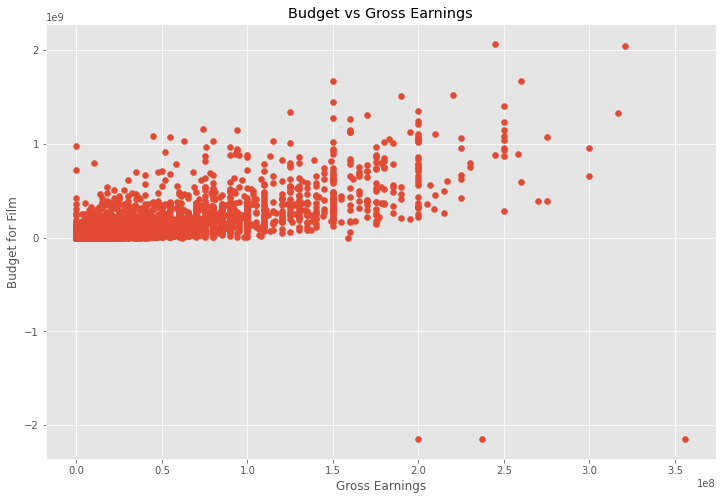

In [81]:
#Scatter plot with budget against gross revenue 

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')
plt.show()

In [80]:
df.head()

name rating      genre  year  \
6663  Star Wars: Episode VII - The Force Awakens  PG-13     Action  2015   
7244                      Avengers: Infinity War  PG-13     Action  2018   
7480                               The Lion King     PG  Animation  2019   
6653                              Jurassic World  PG-13     Action  2015   
6043                                The Avengers  PG-13     Action  2012   

                               released  score      votes         director  \
6663  December 18, 2015 (United States)    7.8   876000.0      J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0    Anthony Russo   
7480      July 19, 2019 (United States)    6.9   222000.0      Jon Favreau   
6653      June 12, 2015 (United States)    7.0   593000.0  Colin Trevorrow   
6043        May 4, 2012 (United States)    8.0  1300000.0      Joss Whedon   

                  writer               star        country     budget  \
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   
7480      Jeff Nathanson      Donald Glover  United States  260000000   
6653          Rick Jaffa        Chris Pratt  United States  150000000   
6043         Joss Whedon  Robert Downey Jr.  United States  220000000   

           gross               company  runtime  yearcorrect  
6663  2069521700             Lucasfilm    138.0         2015  
7244  2048359754        Marvel Studios    149.0         2018  
7480  1670727580  Walt Disney Pictures    118.0         2019  
6653  1670516444    Universal Pictures    124.0         2015  
6043  1518815515        Marvel Studios    143.0         2012

<AxesSubplot:xlabel='budget', ylabel='gross'>

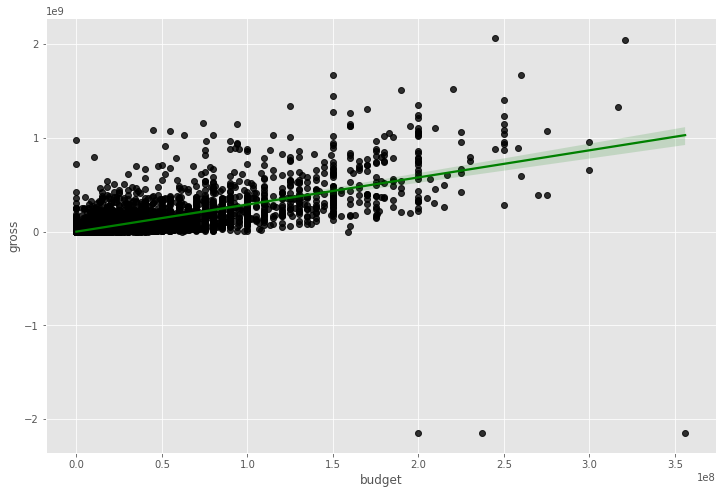

In [91]:
# Budget vs gross using seaborn 

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'black'}, line_kws={'color':'green'})

In [100]:
# Correlation 

df.corr(method='pearson') #pearson, kendall, spearman

year     score     votes    budget     gross   runtime  \
year         1.000000  0.102346  0.226895  0.314842  0.259044  0.120676   
score        0.102346  1.000000  0.411931  0.056781  0.171122  0.400574   
votes        0.226895  0.411931  1.000000  0.485301  0.573871  0.309366   
budget       0.314842  0.056781  0.485301  1.000000  0.687292  0.270042   
gross        0.259044  0.171122  0.573871  0.687292  1.000000  0.203564   
runtime      0.120676  0.400574  0.309366  0.270042  0.203564  1.000000   
yearcorrect  0.997466  0.109815  0.222317  0.305530  0.252184  0.120370   

             yearcorrect  
year            0.997466  
score           0.109815  
votes           0.222317  
budget          0.305530  
gross           0.252184  
runtime         0.120370  
yearcorrect     1.000000

In [98]:
# High correlation between budget and gross 

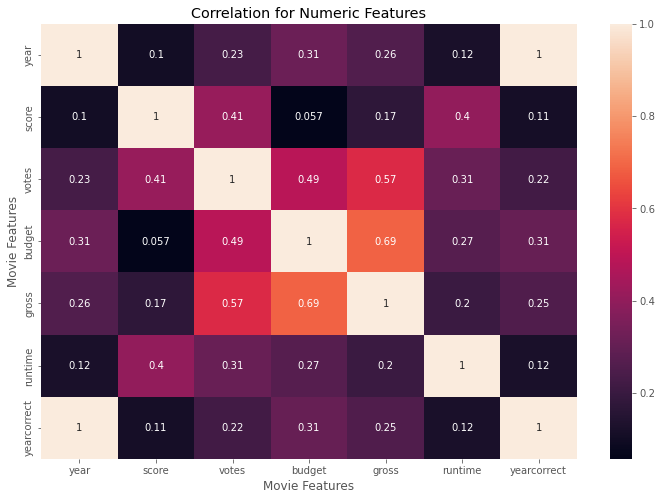

In [101]:
correlation_matrix = df.corr(method='pearson') 

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')
plt.show()

In [102]:
# Company

df.head()

name rating      genre  year  \
6663  Star Wars: Episode VII - The Force Awakens  PG-13     Action  2015   
7244                      Avengers: Infinity War  PG-13     Action  2018   
7480                               The Lion King     PG  Animation  2019   
6653                              Jurassic World  PG-13     Action  2015   
6043                                The Avengers  PG-13     Action  2012   

                               released  score      votes         director  \
6663  December 18, 2015 (United States)    7.8   876000.0      J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0    Anthony Russo   
7480      July 19, 2019 (United States)    6.9   222000.0      Jon Favreau   
6653      June 12, 2015 (United States)    7.0   593000.0  Colin Trevorrow   
6043        May 4, 2012 (United States)    8.0  1300000.0      Joss Whedon   

                  writer               star        country     budget  \
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   
7480      Jeff Nathanson      Donald Glover  United States  260000000   
6653          Rick Jaffa        Chris Pratt  United States  150000000   
6043         Joss Whedon  Robert Downey Jr.  United States  220000000   

           gross               company  runtime  yearcorrect  
6663  2069521700             Lucasfilm    138.0         2015  
7244  2048359754        Marvel Studios    149.0         2018  
7480  1670727580  Walt Disney Pictures    118.0         2019  
6653  1670516444    Universal Pictures    124.0         2015  
6043  1518815515        Marvel Studios    143.0         2012

In [ ]:
df_numerized = df 

for col_name in df_numerized.columns: 
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

In [106]:
df

name  rating  genre  year  \
6663         Star Wars: Episode VII - The Force Awakens       5      0  2015   
7244                             Avengers: Infinity War       5      0  2018   
7480                                      The Lion King       4      2  2019   
6653                                     Jurassic World       5      0  2015   
6043                                       The Avengers       5      0  2012   
6646                                          Furious 7       5      0  2015   
7494                                          Frozen II       4      2  2019   
6644                            Avengers: Age of Ultron       5      0  2015   
7247                                      Black Panther       5      0  2018   
5845       Harry Potter and the Deathly Hallows: Part 2       5      1  2011   
7075            Star Wars: Episode VIII - The Last Jedi       5      0  2017   
7271                     Jurassic World: Fallen Kingdom       5      0  2018   
6262                                             Frozen       4      2  2013   
7072                               Beauty and the Beast       4      7  2017   
7281                                      Incredibles 2       4      2  2018   
7055                            The Fate of the Furious       5      0  2017   
6244                                         Iron Man 3       5      0  2013   
6688                                            Minions       4      2  2015   
6846                         Captain America: Civil War       5      0  2016   
7250                                            Aquaman       5      0  2018   
4245      The Lord of the Rings: The Return of the King       5      0  2003   
7458                          Spider-Man: Far from Home       5      0  2019   
7456                                     Captain Marvel       5      0  2019   
5878                     Transformers: Dark of the Moon       5      0  2011   
6059                                            Skyfall       5      0  2012   
6494                    Transformers: Age of Extinction       5      0  2014   
2448                                      The Lion King       1      2  1994   
6047                              The Dark Knight Rises       5      0  2012   
7463      Star Wars: Episode IX - The Rise of Skywalker       5      0  2019   
7450                                              Joker       6      5  2019   
7488                                        Toy Story 4       1      2  2019   
5685                                        Toy Story 3       1      2  2010   
4852         Pirates of the Caribbean: Dead Man's Chest       5      0  2006   
6869                       Rogue One: A Star Wars Story       5      0  2016   
7481                                            Aladdin       4      1  2019   
5860        Pirates of the Caribbean: on Stranger Tides       5      0  2011   
7140                                    Despicable Me 3       4      2  2017   
2245                                      Jurassic Park       5      0  1993   
6908                                       Finding Dory       4      2  2016   
3451          Star Wars: Episode I - The Phantom Menace       4      0  1999   
5667                                Alice in Wonderland       4      1  2010   
6863                                           Zootopia       4      2  2016   
6045                  The Hobbit: An Unexpected Journey       5      1  2012   
3843              Harry Potter and the Sorcerer's Stone       4      1  2001   
5243                                    The Dark Knight       5      0  2008   
5652       Harry Potter and the Deathly Hallows: Part 1       5      1  2010   
6311                                    Despicable Me 2       4      2  2013   
6905                                    The Jungle Book       4      1  2016   
7051                     Jumanji: Welcome to the Jungle       5      0  2017   
6455          The Hobbit: The Battle of the Five Ar

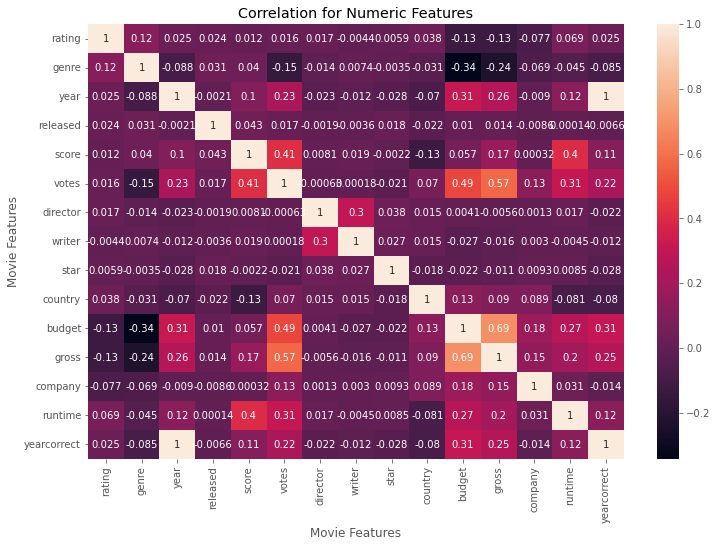

In [107]:
correlation_matrix = df.corr(method='pearson') 

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')
plt.show()

In [108]:
df_numerized.corr()

rating     genre      year  released     score     votes  \
rating       1.000000  0.117566  0.024989  0.024319  0.011538  0.016086   
genre        0.117566  1.000000 -0.088172  0.030625  0.040090 -0.148420   
year         0.024989 -0.088172  1.000000 -0.002088  0.102346  0.226895   
released     0.024319  0.030625 -0.002088  1.000000  0.043175  0.016877   
score        0.011538  0.040090  0.102346  0.043175  1.000000  0.411931   
votes        0.016086 -0.148420  0.226895  0.016877  0.411931  1.000000   
director     0.017205 -0.013508 -0.022765 -0.001868  0.008071 -0.000627   
writer      -0.004387  0.007351 -0.012318 -0.003569  0.019084  0.000177   
star         0.005905 -0.003525 -0.027691  0.018026 -0.002193 -0.020977   
country      0.037738 -0.031485 -0.070266 -0.022109 -0.130094  0.069582   
budget      -0.126806 -0.342064  0.314842  0.009995  0.056781  0.485301   
gross       -0.128424 -0.236081  0.259044  0.013566  0.171122  0.573871   
company     -0.076807 -0.068678 -0.009026 -0.008570  0.000316  0.129596   
runtime      0.069089 -0.044631  0.120676  0.000145  0.400574  0.309366   
yearcorrect  0.025213 -0.084559  0.997466 -0.006580  0.109815  0.222317   

             director    writer      star   country    budget     gross  \
rating       0.017205 -0.004387  0.005905  0.037738 -0.126806 -0.128424   
genre       -0.013508  0.007351 -0.003525 -0.031485 -0.342064 -0.236081   
year        -0.022765 -0.012318 -0.027691 -0.070266  0.314842  0.259044   
released    -0.001868 -0.003569  0.018026 -0.022109  0.009995  0.013566   
score        0.008071  0.019084 -0.002193 -0.130094  0.056781  0.171122   
votes       -0.000627  0.000177 -0.020977  0.069582  0.485301  0.573871   
director     1.000000  0.297479  0.037570  0.015245  0.004140 -0.005649   
writer       0.297479  1.000000  0.026584  0.014937 -0.027145 -0.016380   
star         0.037570  0.026584  1.000000 -0.017626 -0.021930 -0.011032   
country      0.015245  0.014937 -0.017626  1.000000  0.126337  0.090252   
budget       0.004140 -0.027145 -0.021930  0.126337  1.000000  0.687292   
gross       -0.005649 -0.016380 -0.011032  0.090252  0.687292  1.000000   
company      0.001337  0.003035  0.009317  0.089006  0.181374  0.146934   
runtime      0.017386 -0.004526  0.008474 -0.081464  0.270042  0.203564   
yearcorrect -0.022096 -0.012013 -0.028103 -0.080397  0.305530  0.252184   

              company   runtime  yearcorrect  
rating      -0.076807  0.069089     0.025213  
genre       -0.068678 -0.044631    -0.084559  
year        -0.009026  0.120676     0.997466  
released    -0.008570  0.000145    -0.006580  
score        0.000316  0.400574     0.109815  
votes        0.129596  0.309366     0.222317  
director     0.001337  0.017386    -0.022096  
writer       0.003035 -0.004526    -0.012013  
star         0.009317  0.008474    -0.028103  
country      0.089006 -0.081464    -0.080397  
budget       0.181374  0.270042     0.305530  
gross        0.146934  0.203564     0.252184  
company      1.000000  0.030941    -0.014054  
runtime      0.030941  1.000000     0.120370  
yearcorrect -0.014054  0.120370     1.000000

In [109]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

rating       rating         1.000000
             genre          0.117566
             year           0.024989
             released       0.024319
             score          0.011538
             votes          0.016086
             director       0.017205
             writer        -0.004387
             star           0.005905
             country        0.037738
             budget        -0.126806
             gross         -0.128424
             company       -0.076807
             runtime        0.069089
             yearcorrect    0.025213
genre        rating         0.117566
             genre          1.000000
             year          -0.088172
             released       0.030625
             score          0.040090
             votes         -0.148420
             director      -0.013508
             writer         0.007351
             star          -0.003525
             country       -0.031485
             budget        -0.342064
             gross         -0.236081
 

In [110]:
#What each item is comparing itself with per each column 


In [111]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget       genre         -0.342064
genre        budget        -0.342064
gross        genre         -0.236081
genre        gross         -0.236081
votes        genre         -0.148420
genre        votes         -0.148420
country      score         -0.130094
score        country       -0.130094
rating       gross         -0.128424
gross        rating        -0.128424
rating       budget        -0.126806
budget       rating        -0.126806
year         genre         -0.088172
genre        year          -0.088172
             yearcorrect   -0.084559
yearcorrect  genre         -0.084559
runtime      country       -0.081464
country      runtime       -0.081464
yearcorrect  country       -0.080397
country      yearcorrect   -0.080397
rating       company       -0.076807
company      rating        -0.076807
year         country       -0.070266
country      year          -0.070266
company      genre         -0.068678
genre        company       -0.068678
runtime      genre         -0.044631
g

In [114]:
high_corr = sorted_pairs[(sorted_pairs)> 0.5]

high_corr

gross        votes          0.573871
votes        gross          0.573871
budget       gross          0.687292
gross        budget         0.687292
year         yearcorrect    0.997466
yearcorrect  year           0.997466
rating       rating         1.000000
writer       writer         1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [115]:
#Votes and budget have the highest correlation to gross earnings 

In [116]:
#Company has low correlation 